In [1]:
import pandas as pd

In [20]:
import pandas as pd

df = pd.read_excel(r"C:\Users\152\Downloads\영어크롤링임베딩.xlsx.xlsx", index_col=0)
df

,Date,Name,Score,Review,like,token,vector
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"['complet', 'frustrat', 'experi', 'paid', 'ext...",[-0.13434231 -0.1759159 -0.17113061 0.185344...
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"['good', 'featur', 'app', 'smart', 'would', 't...",[ 0.03618171 -0.01203014 0.02510391 -0.074861...
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"['app', 'work', 'perfectli', 'allow', 'us', 'd...",[ 0.02501285 0.1104259 0.1731757 -0.101633...
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"['good', 'great', 'app', 'lg', 'user', 'interf...",[-0.25846013 0.17875025 -0.2734563 -0.263128...
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"['app', 'use', 'limit', 'requir', 'updat', 'wi...",[ 0.29014143 0.19826113 -0.2062311 0.291473...
...,...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"['even', 'open', 'app', 'crash']",[-0.15499765 -0.22054452 0.11573298 -0.198133...
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"['well', 'helpful', 'refer', 'applic', 'good',...",[-0.11027051 -0.20000634 0.09238691 -0.320224...
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"['instal', 'show', 'error']",[-0.23956208 -0.12949653 0.0587365 -0.147238...
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"['everi', 'usabl', 'app', 'tnx', 'lg']",[ 0.02977183 0.12784998 0.13810658 -0.170282...


In [21]:
df["Review"].isnull().sum()

np.int64(0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4870 entries, 0 to 4869
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4870 non-null   object
 1   Name    4870 non-null   object
 2   Score   4870 non-null   int64 
 3   Review  4870 non-null   object
 4   like    4870 non-null   int64 
 5   token   4870 non-null   object
 6   vector  4870 non-null   object
dtypes: int64(2), object(5)
memory usage: 304.4+ KB


In [23]:
#사용자 함수 만드는 코드 
def erase_double_blank(string):
    result = string
    while "  " in result:
        result = result.replace("  ", " ")
    while ",," in result:
        result = result.replace(",,", ",")
    while ", ," in result:
        result = result.replace(", ,", ",")
    result = result.replace("[, ", "[")
    result = result.replace(", ]", "]")
    return result
 

In [25]:
! pip install ast

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
      exec(compile('''
      ~~~~^^^^^^^^^^^^
      # This is <pip-setuptools-caller> -- a caller that pip uses to run setup.py
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ...<32 lines>...
      exec(compile(setup_py_code, filename, "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      ''' % ('C:\\Users\\152\\AppData\\Local\\Temp\\pip-install-yizg7f4p\\ast_6e0b38cb7bde4ac081edb19edf3ebe1e\\setup.py',), "<pip-setuptools-caller>", "exec"))
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\152\AppData\Local\Temp\pip-install-yizg7f4p\ast_6e

In [26]:
import ast 

In [27]:
#벡터 컬럼에 사용자 함수로 바꿔준다는 것 
df["vector"] = df["vector"].apply(lambda x : x.replace("\n", " "))
df["vector"] = df["vector"].apply(lambda x : x.replace(" ", ", "))
df["vector"] = df["vector"].apply(lambda x : erase_double_blank(x))
 
df["vector"] = df["vector"].apply(lambda x : ast.literal_eval(x))

In [28]:
df

,Date,Name,Score,Review,like,token,vector
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"['complet', 'frustrat', 'experi', 'paid', 'ext...","[-0.13434231, -0.1759159, -0.17113061, 0.18534..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"['good', 'featur', 'app', 'smart', 'would', 't...","[0.03618171, -0.01203014, 0.02510391, -0.07486..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"['app', 'work', 'perfectli', 'allow', 'us', 'd...","[0.02501285, 0.1104259, 0.1731757, -0.10163309..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"['good', 'great', 'app', 'lg', 'user', 'interf...","[-0.25846013, 0.17875025, -0.2734563, -0.26312..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"['app', 'use', 'limit', 'requir', 'updat', 'wi...","[0.29014143, 0.19826113, -0.2062311, 0.2914731..."
...,...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"['even', 'open', 'app', 'crash']","[-0.15499765, -0.22054452, 0.11573298, -0.1981..."
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"['well', 'helpful', 'refer', 'applic', 'good',...","[-0.11027051, -0.20000634, 0.09238691, -0.3202..."
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"['instal', 'show', 'error']","[-0.23956208, -0.12949653, 0.0587365, -0.14723..."
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"['everi', 'usabl', 'app', 'tnx', 'lg']","[0.02977183, 0.12784998, 0.13810658, -0.170282..."


In [30]:
from sklearn.cluster import KMeans

In [31]:
import numpy as np

In [32]:
# K-means 

#클러스터 개수를 3개 
k=3
model = KMeans(n_clusters = k ) #변수로 넣어서 재활용 하기 쉽게 만들어줌 .
#model.fit()

In [36]:
arr_vec=np.array(list(df['vector']))

In [37]:
model.fit(arr_vec)

C:\Users\152\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\152\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\152\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\152\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        

KMeans(n_clusters=3)

In [42]:
df['kmeans'] = model.fit_predict(arr_vec)
df

,Date,Name,Score,Review,like,token,vector,kmeans
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"['complet', 'frustrat', 'experi', 'paid', 'ext...","[-0.13434231, -0.1759159, -0.17113061, 0.18534...",0
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"['good', 'featur', 'app', 'smart', 'would', 't...","[0.03618171, -0.01203014, 0.02510391, -0.07486...",0
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"['app', 'work', 'perfectli', 'allow', 'us', 'd...","[0.02501285, 0.1104259, 0.1731757, -0.10163309...",0
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"['good', 'great', 'app', 'lg', 'user', 'interf...","[-0.25846013, 0.17875025, -0.2734563, -0.26312...",1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"['app', 'use', 'limit', 'requir', 'updat', 'wi...","[0.29014143, 0.19826113, -0.2062311, 0.2914731...",2
...,...,...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"['even', 'open', 'app', 'crash']","[-0.15499765, -0.22054452, 0.11573298, -0.1981...",1
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"['well', 'helpful', 'refer', 'applic', 'good',...","[-0.11027051, -0.20000634, 0.09238691, -0.3202...",2
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"['instal', 'show', 'error']","[-0.23956208, -0.12949653, 0.0587365, -0.14723...",1
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"['everi', 'usabl', 'app', 'tnx', 'lg']","[0.02977183, 0.12784998, 0.13810658, -0.170282...",0


In [43]:
#DBSCAN

from sklearn.cluster import DBSCAN

In [46]:
model_db = DBSCAN(eps=0.9, min_samples=5 )

In [47]:
model_db.fit(arr_vec)

DBSCAN(eps=0.9)

In [49]:
df['dbscan'] = model_db.fit_predict(arr_vec)

In [51]:
df['dbscan'].describe()

count    4870.000000
mean       -0.200000
std         0.479868
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dbscan, dtype: float64

In [52]:
max(df['dbscan'])

1

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
model_ag = AgglomerativeClustering(n_clusters = 3 )

In [56]:
model_ag.fit(arr_vec)

AgglomerativeClustering(n_clusters=3)

In [58]:
df['agg']=model.fit_predict(arr_vec)

In [60]:

from sklearn.metrics import silhouette_score

In [62]:
print(silhouette_score(arr_vec, df['kmeans'], metric = 'euclidean'))

0.10867332391732604


In [63]:
df

,Date,Name,Score,Review,like,token,vector,kmeans,dbscan,agg
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"['complet', 'frustrat', 'experi', 'paid', 'ext...","[-0.13434231, -0.1759159, -0.17113061, 0.18534...",0,0,0
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"['good', 'featur', 'app', 'smart', 'would', 't...","[0.03618171, -0.01203014, 0.02510391, -0.07486...",0,0,0
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"['app', 'work', 'perfectli', 'allow', 'us', 'd...","[0.02501285, 0.1104259, 0.1731757, -0.10163309...",0,0,0
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"['good', 'great', 'app', 'lg', 'user', 'interf...","[-0.25846013, 0.17875025, -0.2734563, -0.26312...",1,-1,2
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"['app', 'use', 'limit', 'requir', 'updat', 'wi...","[0.29014143, 0.19826113, -0.2062311, 0.2914731...",2,-1,2
...,...,...,...,...,...,...,...,...,...,...
4865,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"['even', 'open', 'app', 'crash']","[-0.15499765, -0.22054452, 0.11573298, -0.1981...",1,-1,2
4866,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"['well', 'helpful', 'refer', 'applic', 'good',...","[-0.11027051, -0.20000634, 0.09238691, -0.3202...",2,0,1
4867,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"['instal', 'show', 'error']","[-0.23956208, -0.12949653, 0.0587365, -0.14723...",1,-1,2
4868,"January 8, 2017",Jumar Ando,5,this is every usable apps tnx lg,0,"['everi', 'usabl', 'app', 'tnx', 'lg']","[0.02977183, 0.12784998, 0.13810658, -0.170282...",0,0,0


In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components = 2) # 30차원을 2차원으로 축소!
principalComponents = pca.fit_transform(arr_vec)

In [67]:
principalComponents.shape

(4870, 2)

In [73]:
df_pca= pd.DataFrame(data = principalComponents, columns = ['pca1','pca2'])

In [72]:
df[['kmeans','dbscan','agg']]

,kmeans,dbscan,agg
0,0,0,0
1,0,0,0
2,0,0,0
3,1,-1,2
4,2,-1,2
...,...,...,...
4865,1,-1,2
4866,2,0,1
4867,1,-1,2
4868,0,0,0


In [74]:
df_pca[['kmeans','dbscan','agg']] = df[['kmeans','dbscan','agg']]
df_pca

,pca1,pca2,kmeans,dbscan,agg
0,-0.214189,-0.119620,0,0,0
1,-0.506845,-0.023653,0,0,0
2,-0.352377,-0.260120,0,0,0
3,0.424192,-0.370166,1,-1,2
4,0.385409,0.583861,2,-1,2
...,...,...,...,...,...
4865,0.563727,0.022356,1,-1,2
4866,0.172104,-0.277059,2,0,1
4867,0.671218,-0.422237,1,-1,2
4868,-0.280768,0.024077,0,0,0


In [75]:
import matplotlib.pyplot as plt

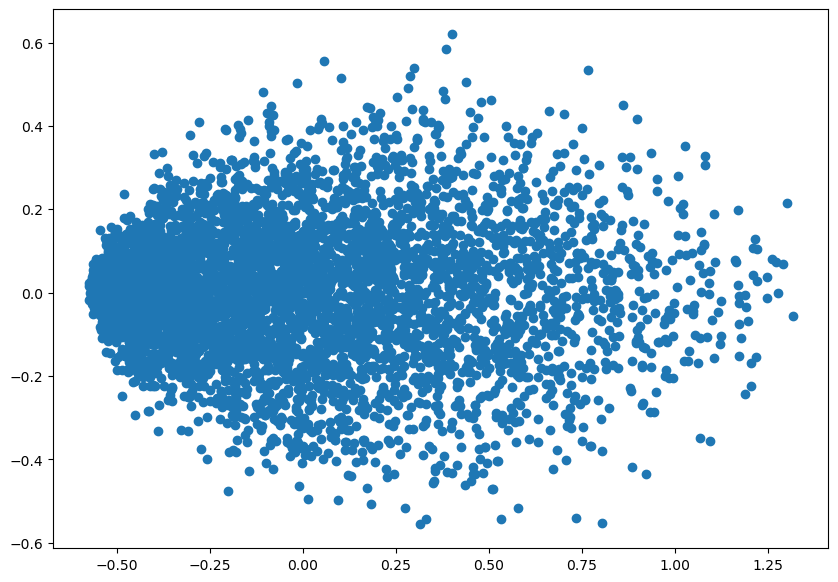

In [77]:
plt.figure(figsize=(10,7))
plt.scatter(df_pca['pca1'], df_pca['pca2'])
plt.show()

In [78]:
color = ['red','green','blue']

100%|██████████████████████████████████████████████████████████████████████████████| 4870/4870 [01:34<00:00, 51.64it/s]


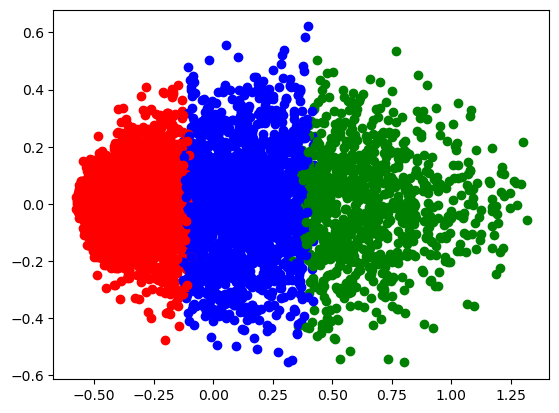

In [89]:
from tqdm import tqdm

for i in tqdm(df_pca.index):
    plt.scatter(df_pca['pca1'].loc[i],
               df_pca['pca2'].loc[i],
               color = color[df_pca['kmeans'].loc[i]])
plt.show()

In [94]:
wine = pd.read_csv("C:/Users/152/Downloads/wine.csv.csv", encoding="utf-8", index_col=0)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [95]:
wine = wine.iloc

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler() #스케일러 만들기


In [101]:
#스케일러 적용하기 (명목척도 제외)
scaler.fit(wine)


ValueError: setting an array element with a sequence.

In [ ]:
pd.DataFrame